In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.dates as mdates
from datetime import date

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier,CatBoostRegressor, Pool

In [2]:
# Read data

df = pd.read_csv('pharmacy_tx.csv')
drugsplit=df['drug'].str.split(" ",n=1,expand=True)
df['drug_type']=drugsplit[0]
df['drug_name']=drugsplit[1]
df

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,drug_type,drug_name
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,branded,tanoclolol
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,branded,oxasoted
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,branded,cupitelol
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,generic,oxasoted
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,branded,mamate
...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00,branded,colifunene
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28,generic,tafistitrisin
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94,generic,tanoclolol
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93,branded,prazinib


In [81]:
Y=df.patient_pay
Y_r=1*(df.rejected==1)
X=df[['pharmacy','diagnosis','drug_type','drug_name','bin']]



In [90]:
#subsample data
X_train, X_test, y_r_train, y_r_test = train_test_split(X.copy(),Y_r.copy(),
                                                       shuffle=True,
                                                       random_state=222,
                                                       stratify=Y_r,
                                                       test_size=.2)

In [91]:
cat_features = np.where(X.dtypes != float)[0]
train_data=Pool(data=X_train,label=y_r_train,cat_features=cat_features)

In [92]:
model= CatBoostClassifier(iterations=30,depth=10,task_type="GPU",devices='0:1')
model.fit(train_data)

Learning rate set to 0.467433
0:	learn: 0.4314149	total: 174ms	remaining: 5.04s
1:	learn: 0.3338688	total: 346ms	remaining: 4.84s
2:	learn: 0.2888720	total: 522ms	remaining: 4.7s
3:	learn: 0.2432228	total: 806ms	remaining: 5.24s
4:	learn: 0.2197686	total: 1.06s	remaining: 5.32s
5:	learn: 0.2068381	total: 1.35s	remaining: 5.38s
6:	learn: 0.1996696	total: 1.63s	remaining: 5.35s
7:	learn: 0.1950308	total: 2.07s	remaining: 5.71s
8:	learn: 0.1910659	total: 2.54s	remaining: 5.92s
9:	learn: 0.1881245	total: 2.99s	remaining: 5.97s
10:	learn: 0.1861343	total: 3.46s	remaining: 5.97s
11:	learn: 0.1843093	total: 3.94s	remaining: 5.91s
12:	learn: 0.1833998	total: 4.39s	remaining: 5.74s
13:	learn: 0.1824629	total: 4.86s	remaining: 5.56s
14:	learn: 0.1817591	total: 5.33s	remaining: 5.33s
15:	learn: 0.1816065	total: 5.75s	remaining: 5.03s
16:	learn: 0.1813198	total: 6.19s	remaining: 4.73s
17:	learn: 0.1807927	total: 6.68s	remaining: 4.45s
18:	learn: 0.1807023	total: 7.12s	remaining: 4.12s
19:	learn: 0

In [85]:
Y_r_pred = model.predict(X_test)
acc = sum(y_r_test == Y_r_pred)/len(Y_r_pred)
print(acc)

#accuracy = 92.19% with 50 iterations, learning_rate= 0.3, depth=10

0.9218662216229836


In [93]:
#problem here, prediction doesn't work. Still debugging
sum(Y_r_pred)

0

In [8]:
# Patient Pay 

#subsample data
X_train, X_test, y_train, y_test = train_test_split(X.copy(),Y.copy(),
                                                       shuffle=True,
                                                       random_state=222,
                                                       stratify=Y,
                                                       test_size=.2)

cat_features = np.where(X.dtypes != float)[0]
train_data=Pool(data=X_train,label=y_train,cat_features=cat_features)
#test_data=Pool(data=X_test,label=y_test,cat_features=cat_features)

0:	learn: 37.0659839	total: 434ms	remaining: 3.9s
1:	learn: 35.5288160	total: 895ms	remaining: 3.58s
2:	learn: 33.5020396	total: 1.37s	remaining: 3.2s
3:	learn: 32.4411597	total: 1.84s	remaining: 2.77s
4:	learn: 31.9121268	total: 2.31s	remaining: 2.31s
5:	learn: 31.2422846	total: 2.76s	remaining: 1.84s
6:	learn: 30.9027111	total: 3.22s	remaining: 1.38s
7:	learn: 30.5729373	total: 3.7s	remaining: 926ms
8:	learn: 30.4100190	total: 4.17s	remaining: 463ms
9:	learn: 30.2979591	total: 4.67s	remaining: 0us


In [51]:
model= CatBoostRegressor(iterations=200,learning_rate=0.5,depth=10)
model.fit(train_data)

0:	learn: 33.5784735	total: 7.79s	remaining: 25m 49s
1:	learn: 31.4625676	total: 13.1s	remaining: 21m 37s
2:	learn: 30.5385920	total: 18.7s	remaining: 20m 25s
3:	learn: 30.3092616	total: 24s	remaining: 19m 36s
4:	learn: 30.1085373	total: 30.4s	remaining: 19m 44s
5:	learn: 30.0245605	total: 37.5s	remaining: 20m 11s
6:	learn: 29.9440438	total: 41.4s	remaining: 19m 2s
7:	learn: 29.9103515	total: 45.9s	remaining: 18m 21s
8:	learn: 29.8828268	total: 50.7s	remaining: 17m 56s
9:	learn: 29.8572868	total: 55s	remaining: 17m 25s
10:	learn: 29.8134646	total: 1m	remaining: 17m 21s
11:	learn: 29.7801505	total: 1m 4s	remaining: 16m 46s
12:	learn: 29.7514398	total: 1m 8s	remaining: 16m 32s
13:	learn: 29.7408195	total: 1m 13s	remaining: 16m 19s
14:	learn: 29.6957734	total: 1m 17s	remaining: 15m 59s
15:	learn: 29.6830051	total: 1m 22s	remaining: 15m 51s
16:	learn: 29.6669332	total: 1m 26s	remaining: 15m 32s
17:	learn: 29.6596058	total: 1m 30s	remaining: 15m 17s
18:	learn: 29.6458736	total: 1m 34s	remai

152:	learn: 29.0349459	total: 11m 7s	remaining: 3m 25s
153:	learn: 29.0340770	total: 11m 11s	remaining: 3m 20s
154:	learn: 29.0319185	total: 11m 14s	remaining: 3m 15s
155:	learn: 29.0306546	total: 11m 18s	remaining: 3m 11s
156:	learn: 29.0284977	total: 11m 22s	remaining: 3m 6s
157:	learn: 29.0277593	total: 11m 26s	remaining: 3m 2s
158:	learn: 29.0251803	total: 11m 29s	remaining: 2m 57s
159:	learn: 29.0246750	total: 11m 33s	remaining: 2m 53s
160:	learn: 29.0240749	total: 11m 37s	remaining: 2m 48s
161:	learn: 29.0223397	total: 11m 41s	remaining: 2m 44s
162:	learn: 29.0196489	total: 11m 45s	remaining: 2m 40s
163:	learn: 29.0195609	total: 11m 48s	remaining: 2m 35s
164:	learn: 29.0175805	total: 11m 52s	remaining: 2m 31s
165:	learn: 29.0166242	total: 11m 56s	remaining: 2m 26s
166:	learn: 29.0160882	total: 12m 1s	remaining: 2m 22s
167:	learn: 29.0135099	total: 12m 5s	remaining: 2m 18s
168:	learn: 29.0129852	total: 12m 9s	remaining: 2m 13s
169:	learn: 29.0126528	total: 12m 13s	remaining: 2m 9s

In [52]:
y_pred = model.predict(X_test)
MSE=np.square(np.subtract(y_test,y_pred)).mean()
print(MSE)

847.4602253937338


Text(0.5, 1.0, 'Feature Importance')

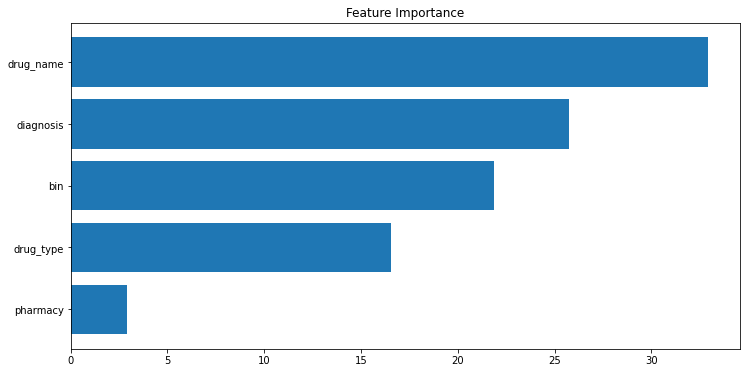

In [53]:
#feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [62]:
#speed up with GPU
model= CatBoostRegressor(iterations=200,depth=10,task_type="GPU",devices='0:1',max_ctr_complexity=1) 
model.fit(train_data)

Learning rate set to 0.357832
0:	learn: 36.6775142	total: 424ms	remaining: 1m 24s
1:	learn: 35.1200676	total: 890ms	remaining: 1m 28s
2:	learn: 32.9984028	total: 1.36s	remaining: 1m 29s
3:	learn: 32.0577987	total: 1.84s	remaining: 1m 30s
4:	learn: 31.6606988	total: 2.31s	remaining: 1m 29s
5:	learn: 31.1023882	total: 2.76s	remaining: 1m 29s
6:	learn: 30.8522518	total: 3.22s	remaining: 1m 28s
7:	learn: 30.5181293	total: 3.67s	remaining: 1m 28s
8:	learn: 30.3318921	total: 4.16s	remaining: 1m 28s
9:	learn: 30.1611194	total: 4.63s	remaining: 1m 27s
10:	learn: 30.0823905	total: 5.09s	remaining: 1m 27s
11:	learn: 30.0240254	total: 5.55s	remaining: 1m 27s
12:	learn: 29.9754407	total: 6.05s	remaining: 1m 27s
13:	learn: 29.9590988	total: 6.55s	remaining: 1m 27s
14:	learn: 29.9374340	total: 7.03s	remaining: 1m 26s
15:	learn: 29.9115608	total: 7.54s	remaining: 1m 26s
16:	learn: 29.9004823	total: 8.01s	remaining: 1m 26s
17:	learn: 29.8723362	total: 8.5s	remaining: 1m 25s
18:	learn: 29.8514084	total

156:	learn: 29.3672576	total: 1m 12s	remaining: 19.9s
157:	learn: 29.3662722	total: 1m 13s	remaining: 19.4s
158:	learn: 29.3659948	total: 1m 13s	remaining: 19s
159:	learn: 29.3657348	total: 1m 14s	remaining: 18.5s
160:	learn: 29.3649451	total: 1m 14s	remaining: 18s
161:	learn: 29.3643027	total: 1m 14s	remaining: 17.6s
162:	learn: 29.3634112	total: 1m 15s	remaining: 17.1s
163:	learn: 29.3618113	total: 1m 15s	remaining: 16.7s
164:	learn: 29.3605389	total: 1m 16s	remaining: 16.2s
165:	learn: 29.3599137	total: 1m 16s	remaining: 15.7s
166:	learn: 29.3593887	total: 1m 17s	remaining: 15.3s
167:	learn: 29.3577682	total: 1m 17s	remaining: 14.8s
168:	learn: 29.3570270	total: 1m 18s	remaining: 14.3s
169:	learn: 29.3564486	total: 1m 18s	remaining: 13.9s
170:	learn: 29.3556070	total: 1m 19s	remaining: 13.4s
171:	learn: 29.3540663	total: 1m 19s	remaining: 13s
172:	learn: 29.3522402	total: 1m 20s	remaining: 12.5s
173:	learn: 29.3517292	total: 1m 20s	remaining: 12s
174:	learn: 29.3503749	total: 1m 21s

854.6705534817336


Text(0.5, 1.0, 'Feature Importance')

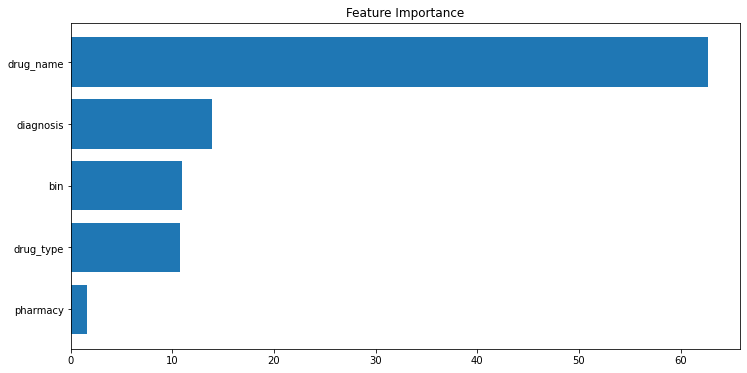

In [63]:
y_pred = model.predict(X_test)
MSE=np.square(np.subtract(y_test,y_pred)).mean()
print(MSE)
#feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [44]:
iteration_rf=[5,25,50,100]

N = len(iteration_rf)
cols = ['Iter', 'MSE']
mse = pd.DataFrame(columns = cols)

for i in range(N):
    
    model= CatBoostRegressor(iterations=iteration_rf[i],depth=10,task_type="GPU",devices='0:1')
    model.fit(train_data)
    y_pred = model.predict(X_test)
    MSE=np.square(np.subtract(y_test,y_pred)).mean()
    mse.loc[i, mse.columns] = iteration_rf[i],MSE
    
    
print(mse)
    

Learning rate set to 0.5
0:	learn: 35.8512120	total: 447ms	remaining: 1.79s
1:	learn: 32.6591268	total: 934ms	remaining: 1.4s
2:	learn: 31.7964605	total: 1.41s	remaining: 937ms
3:	learn: 30.9577760	total: 1.87s	remaining: 467ms
4:	learn: 30.4058732	total: 2.35s	remaining: 0us
Learning rate set to 0.5
0:	learn: 35.8512120	total: 427ms	remaining: 10.3s
1:	learn: 32.6591268	total: 891ms	remaining: 10.2s
2:	learn: 31.7964605	total: 1.36s	remaining: 9.95s
3:	learn: 30.9577760	total: 1.81s	remaining: 9.5s
4:	learn: 30.4058732	total: 2.29s	remaining: 9.18s
5:	learn: 30.2355793	total: 2.78s	remaining: 8.79s
6:	learn: 30.0616961	total: 3.22s	remaining: 8.29s
7:	learn: 29.9861938	total: 3.7s	remaining: 7.86s
8:	learn: 29.9297334	total: 4.21s	remaining: 7.48s
9:	learn: 29.8953609	total: 4.68s	remaining: 7.01s
10:	learn: 29.8270077	total: 5.11s	remaining: 6.51s
11:	learn: 29.8117049	total: 5.57s	remaining: 6.04s
12:	learn: 29.7838502	total: 6s	remaining: 5.54s
13:	learn: 29.7644416	total: 6.5s	rem

78:	learn: 29.4357953	total: 36.5s	remaining: 9.7s
79:	learn: 29.4355890	total: 37s	remaining: 9.24s
80:	learn: 29.4336570	total: 37.4s	remaining: 8.78s
81:	learn: 29.4334991	total: 37.9s	remaining: 8.31s
82:	learn: 29.4323236	total: 38.3s	remaining: 7.85s
83:	learn: 29.4294237	total: 38.8s	remaining: 7.39s
84:	learn: 29.4272146	total: 39.3s	remaining: 6.93s
85:	learn: 29.4261905	total: 39.8s	remaining: 6.47s
86:	learn: 29.4248880	total: 40.2s	remaining: 6.01s
87:	learn: 29.4182841	total: 40.7s	remaining: 5.55s
88:	learn: 29.4178978	total: 41.2s	remaining: 5.09s
89:	learn: 29.4169954	total: 41.7s	remaining: 4.63s
90:	learn: 29.4148072	total: 42.1s	remaining: 4.17s
91:	learn: 29.4132414	total: 42.6s	remaining: 3.7s
92:	learn: 29.4112830	total: 43.1s	remaining: 3.24s
93:	learn: 29.4109591	total: 43.5s	remaining: 2.78s
94:	learn: 29.4086829	total: 44s	remaining: 2.32s
95:	learn: 29.4073859	total: 44.5s	remaining: 1.85s
96:	learn: 29.4070934	total: 45s	remaining: 1.39s
97:	learn: 29.406295

In [64]:
y_test

9014715      5.24
6030366     24.33
4299625     18.27
7063731      0.00
4650225     11.40
            ...  
29017        0.00
12981889    21.14
12526186    12.22
984069      15.43
13172349    17.11
Name: patient_pay, Length: 2782049, dtype: float64

array([  7.32831746,  15.76767435,  14.73833166, ...,   8.34621148,
       126.2768115 ,  13.97982632])